In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dTypes = {
        'fechanacimiento': str
}



dfGenEdad = pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv", dtype=dTypes)
dfAvisos = pd.read_csv("fiuba_5_avisos_online.csv")
dfAvisosDet = pd.read_csv("fiuba_6_avisos_detalle.csv")
dfPostu = pd.read_csv("fiuba_4_postulaciones.csv")
dfVistas = pd.read_csv("fiuba_3_vistas.csv")
dfEdu = pd.read_csv("fiuba_1_postulantes_educacion.csv")


In [2]:
dfPostuGen = pd.merge(dfPostu, dfGenEdad, on=['idpostulante'], how='inner')

In [3]:
dfPostuGen.groupby('sexo').count()

,idaviso,idpostulante,fechapostulacion,fechanacimiento
sexo,,,,
FEM,1688939,1688939,1688939,1686041
MASC,1668601,1668601,1668601,1664916
NO_DECLARA,44083,44083,44083,6202


In [4]:
dfPostuGen = dfPostuGen.loc[(dfPostuGen['sexo'] == 'FEM')|(dfPostuGen['sexo'] == 'MASC'), ['sexo', 'idaviso']]

Text(0,0.5,'Cantidad')

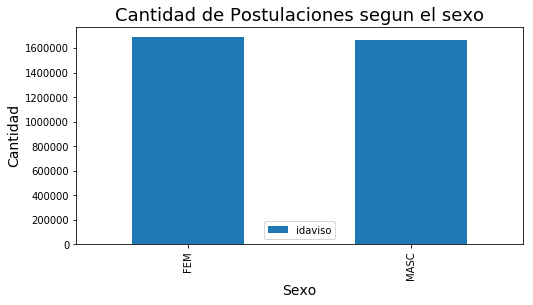

In [5]:
dfPostuGen.groupby('sexo').count().plot(kind='bar', figsize=(8,4))
plt.title('Cantidad de Postulaciones segun el sexo',fontsize="18")
plt.xlabel('Sexo',fontsize="14")
plt.ylabel("Cantidad",fontsize="14")

In [6]:
dfPostuGen.groupby('sexo').count()

,idaviso
sexo,
FEM,1688939
MASC,1668601


In [7]:
dfPostuGen.groupby('sexo').agg({'idaviso':['count', 'sum']})

idaviso                  
        count               sum
sexo                           
FEM   1688939  1877026270168631
MASC  1668601  1854673369406758

In [8]:
dfGenEdad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [9]:
dfGenEdad = dfGenEdad.dropna(subset=['fechanacimiento'], how='any')

In [10]:
def calcular_edad(row):
    
    lista = row['fechanacimiento'].split('-')
    return 2018-int(lista[0])

dfGenEdad['edad'] = dfGenEdad.apply(calcular_edad, axis=1)

In [11]:
dfGenEdad = dfGenEdad.loc[(dfGenEdad['edad']<= 76)&(dfGenEdad['edad']>= 18), ['idpostulante', 'sexo', 'edad']]

In [12]:
dfGenEdad.loc[:, ['idpostulante', 'edad']].sort_values('edad', ascending=True)['edad']

182639    18
195429    18
197703    18
191945    18
177020    18
199763    18
191983    18
161634    18
197716    18
175758    18
175756    18
172116    18
199743    18
172051    18
172033    18
197751    18
188120    18
154541    18
166221    18
188072    18
161862    18
179977    18
183897    18
90271     18
171967    18
182632    18
188249    18
188313    18
199869    18
195510    18
          ..
87775     69
9245      69
3689      69
1085      69
84750     70
5274      70
1440      70
3784      70
168604    70
3750      70
135106    70
80254     70
108855    70
41689     71
49323     71
97800     71
63142     71
52616     71
115060    71
145374    71
520       72
44744     72
98648     74
11671     74
64272     74
25080     75
17969     75
199706    76
15039     76
55962     76
Name: edad, Length: 196125, dtype: int64

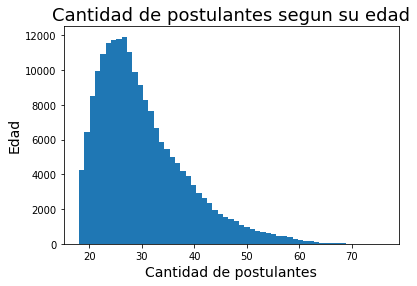

<Figure size 1224x72 with 0 Axes>

In [13]:
#dfGenEdad.loc[:, ['idpostulante', 'edad']].groupby('edad').count().plot(kind='bar', figsize=(12,8))

plt.hist(dfGenEdad.loc[:, ['idpostulante', 'edad']].sort_values('edad', ascending=True)['edad'], bins=57)
plt.xlabel("Cantidad de postulantes", fontsize='14')
plt.ylabel("Edad", fontsize='14')
plt.title("Cantidad de postulantes segun su edad", fontsize='18')
plt.figure(figsize=(17, 1))
plt.show()

In [14]:
dfGenEdad.loc[:, ['idpostulante', 'edad']].sort_values('edad', ascending=True).head()

,idpostulante,edad
182639,2zP08Q6,18
195429,Rzre01x,18
197703,akjMN5Z,18
191945,LNK36Vp,18
177020,wVk1BEp,18


In [15]:
dfPostuEdadGen = pd.merge(dfGenEdad, dfPostu, on=['idpostulante'], how='inner')

In [24]:
CantPostuPromPerson = dfPostuEdadGen.loc[:, ['edad', 'idpostulante']].groupby('edad').count() / dfGenEdad.loc[:, ['edad', 'idpostulante']].groupby("edad").count()
CantPostuPromPerson.head(2)

,idpostulante
edad,
18,12.567986
19,15.913519


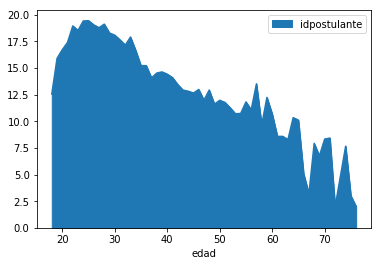

In [35]:

CantPostuPromPerson.plot.area()

#g = sns.barplot(x=(CantPostuPromPerson["idpostulante"]),y=CantPostuPromPerson.index)
#plt.title('Cantidad de Postulaciones segun edad',fontsize="18")
#plt.xlabel('edad',fontsize="14")
#plt.ylabel("cantidad postlaciones",fontsize="14")

In [30]:
# de aca en mas no hay nada 
CantPostuPromPerson2 = CantPostuPromPerson.reset_index()

In [ ]:
CantPostuPromPerson2.head()

In [ ]:
plt.hist(CantPostuPromPerson['idpostulante'], bins=58)
plt.xlabel("Cantidad de postulantes", fontsize='14')
plt.ylabel("Edad", fontsize='14')
plt.title("Cantidad de postulantes segun su edad", fontsize='18')
plt.figure(figsize=(17, 1))
plt.show()

In [ ]:
dfPostu
dfVistas

In [ ]:
dfVistas.shape

In [ ]:
def calcular_anio(row):
    
    lista = row['timestamp'].split('-')
    return int(lista[0])

def calcular_mes(row):
    
    lista = row['timestamp'].split('-')
    return int(lista[1])

def calcular_dia(row):
    
    lista = row['timestamp'].split('-')
    lista2 = lista[2].split('T')
    return int(lista2[0])

#dfVistas['anio'] = dfVistas.apply(calcular_anio, axis=1)
#dfVistas['mes'] = dfVistas.apply(calcular_mes, axis=1)
dfVistas['dia'] = dfVistas.apply(calcular_dia, axis=1)

In [ ]:
def calcular_anio(row):
    
    lista = row['fechapostulacion'].split('-')
    return int(lista[0])

def calcular_mes(row):
    
    lista = row['fechapostulacion'].split('-')
    return int(lista[1])

def calcular_dia(row):
    
    lista = row['fechapostulacion'].split('-')
    lista2 = lista[2].split(' ')
    return int(lista2[0])

dfPostu['anio'] = dfPostu.apply(calcular_anio, axis=1)
dfPostu['mes'] = dfPostu.apply(calcular_mes, axis=1)
dfPostu['dia'] = dfPostu.apply(calcular_dia, axis=1)

In [ ]:
dfVistas.head()

In [ ]:
dfPostu.head()

In [ ]:
dfVistas.sort_values(["dia", "mes"], ascending=False).head()

In [ ]:
dfVistas2 = dfVistas.loc[:, ['mes', 'dia']].head()

In [ ]:
dfPostuFecha = pd.merge(dfPostu, dfVistas2, on=['mes', 'dia'], how='inner')

In [ ]:
dfPostuFecha.head()

In [ ]:
dfPostuFecha.shape

In [ ]:
a = dfVistas.loc[:, ['idpostulante', 'idAviso']].groupby("idpostulante").count().reset_index().head()

In [ ]:
a = a.rename(index=str, columns={"idAviso": "cantidad_vistas"})

In [ ]:
a.head()

In [ ]:
b = dfPostuFecha.loc[:, ['idpostulante', 'idaviso']].groupby("idpostulante").count().reset_index().head()

In [ ]:
b = b.rename(index=str, columns={"idaviso": "cantidad_postulaciones"})

In [ ]:
b.shape

In [ ]:
b.head()

In [ ]:
c = pd.merge(a, b, on=['idpostulante'])

In [ ]:
c.shape